In [23]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("LendingClub.csv", sep=',')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Fully Paid,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Fully Paid,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Fully Paid,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Charged Off,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
#Checking for Missing data

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

None of the variables have null. Now lets look at the usability of the variables:
We typically have 4 types of data measurements:
1. Nominal - A categorical variable type. It Provides least information since it is more like a label. Has no concept of greater than/less than or ordering
2. Ordinal - This is also a categorical variable but provides ranking order. 
3. Interval - These are numerical in nature and have same amount of variation between 2 consecutive variables. For instance temperature. There are 2 types - continuous or discrete
4. Ratio - Provides the modeling benefits of all the above ones while adding a true zero.

Lets categorize all the data fields above into these 4 categories. We will use df["column name"].unique() to figure out distinct values:
Interval Continous:
1. loan_amount - 
2. int_rate
3. installment
4. annual_inc
5. revol_bal
6. revol_util

Interval Discrete:
1. term
2. earliest_cr_line
3. open_acc
4. pub_rec
5. total_acc
6. mort_acc
7. pub_rec_bankruptcies


Ratio:
1. dti

Ordinal:
1. grade
2. sub_grade 
3. home_ownership (Assuming that rent, own, mortagage and other could influence loan eligibility)
4. verification status 


Nominal:
1. purpose ['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy']
2. initial_list_status  ['w', 'f']
3. application_type ['INDIVIDUAL', 'JOINT', 'DIRECT_PAY']
4. address 

Output Variables:
1. loan_status

'loan_amount', 'verification status'

### a)
Lets drop the Nominal Variables since they do not impact the predictability of loan approval. Before dropping the nominal variables like address, we need to extract zipcode. 

In [52]:
df["address"].unique()

array(['0174 Michelle Gateway\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\nNew Michael, FL 29597',
       '787 Michelle Causeway\nBriannaton, AR 48052'], dtype=object)

In [55]:
df["zipcode"]=df["address"].str.split(' ').str[-1]
df["zipcode"].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zipcode, dtype: object

In [63]:
#Based on the noise created after get_dummies for earliest_cr_line column, its best to drop this one as well
df1 = df.drop(["purpose","initial_list_status","application_type","address","earliest_cr_line"], axis=1)
df1.head()
print(list(df1.columns))
#print(df.count) #395219
df1.head()

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'zipcode']


,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,zipcode
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,22690
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,05113
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,05113
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,00813
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,11650


In [67]:
#Now lets convert categorical variables into numeric variables
df1.term = pd.factorize(df1.term)[0]
df1.home_ownership = pd.factorize(df1.home_ownership)[0]
df1.grade=pd.factorize(df1.grade)[0]
df1.sub_grade = pd.factorize(df1.sub_grade)[0]
df1.zipcode=pd.factorize(df1.zipcode)[0]
df1.loan_status=pd.factorize(df1.loan_status)[0]
df1.verification_status=pd.factorize(df1.verification_status)[0]
df1.head()
print(list(df1.columns))
df1.head()

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'zipcode']


,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,zipcode
0,10000.0,0,11.44,329.48,0,0,0,117000.0,0,0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0
1,8000.0,0,11.99,265.68,0,1,1,65000.0,0,0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1
2,15600.0,0,10.49,506.97,0,2,0,43057.0,1,0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1
3,7200.0,0,6.49,220.65,1,3,0,54000.0,0,0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,2
4,24375.0,1,17.27,609.33,2,4,1,55000.0,2,1,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,3


In [81]:
df1.loan_status.unique()

array([0, 1])

In [69]:
#"earliest_cr_line",
X=df1[["loan_amnt","int_rate","installment","annual_inc","revol_bal","term","open_acc","pub_rec","total_acc","mort_acc","pub_rec_bankruptcies","dti","grade","sub_grade","home_ownership","verification_status","zipcode"]]
Y=df1[{"loan_status"}]

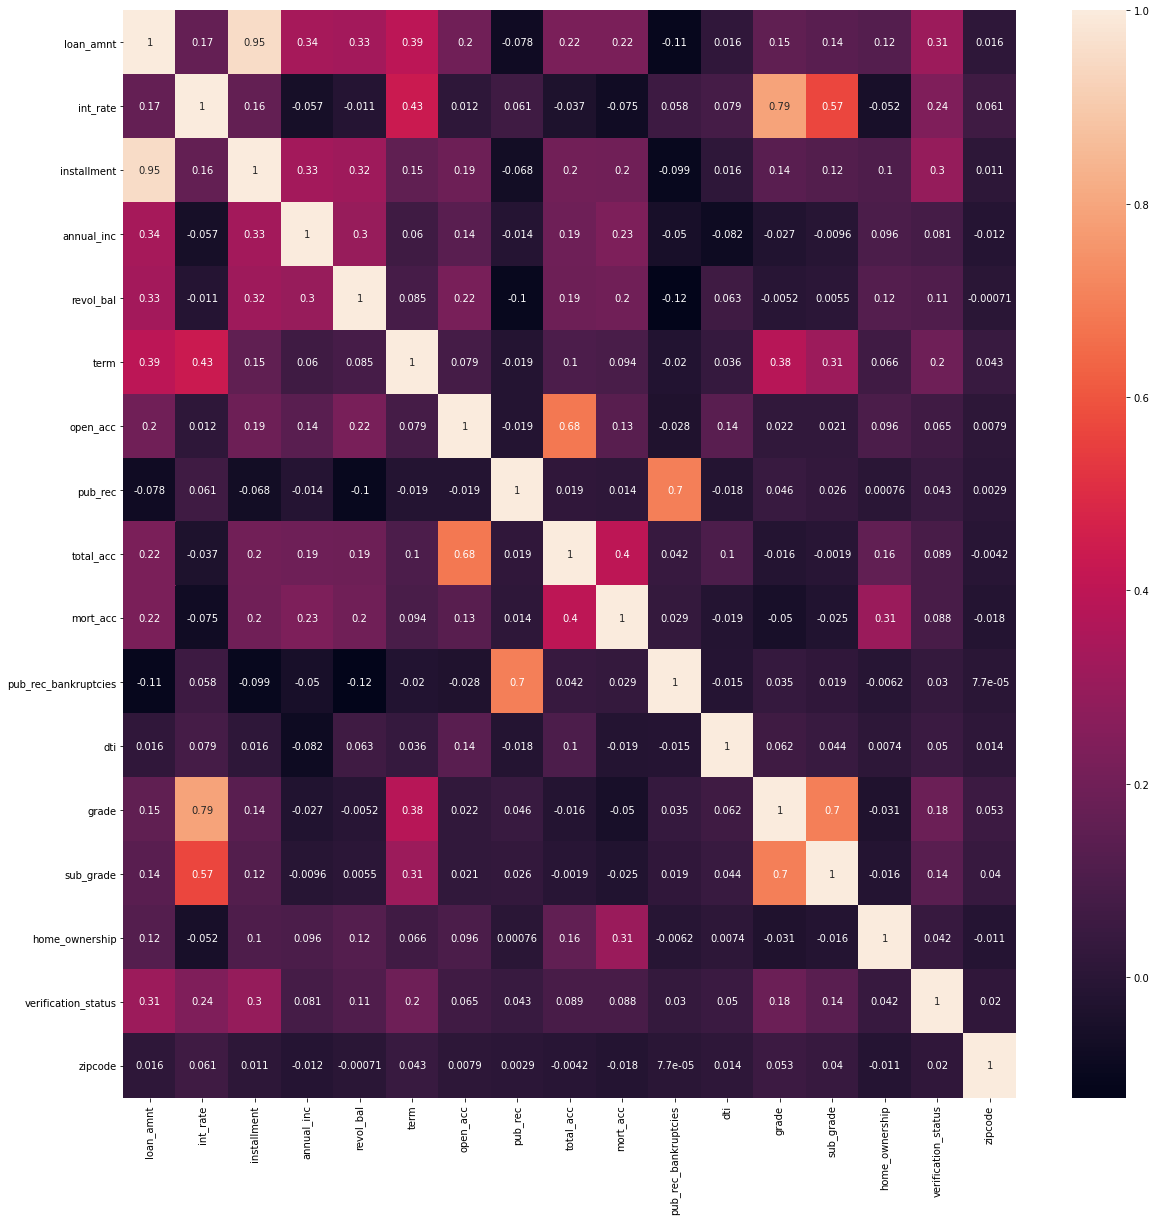

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [ ]:
Inferences from Confusions Matrix:
1. loan_amount has high correlation to installment, which makes sense since higher the amount greater the installment
2. total_acc is proportional to open_acc. 
3. pub_rec is proportional to pub_rec_bankruptcies. 
4. int_rate is correlated to grade and somewhat corelated to subgrade as well 
5. Zipcode seems to be unrelated to any other field.

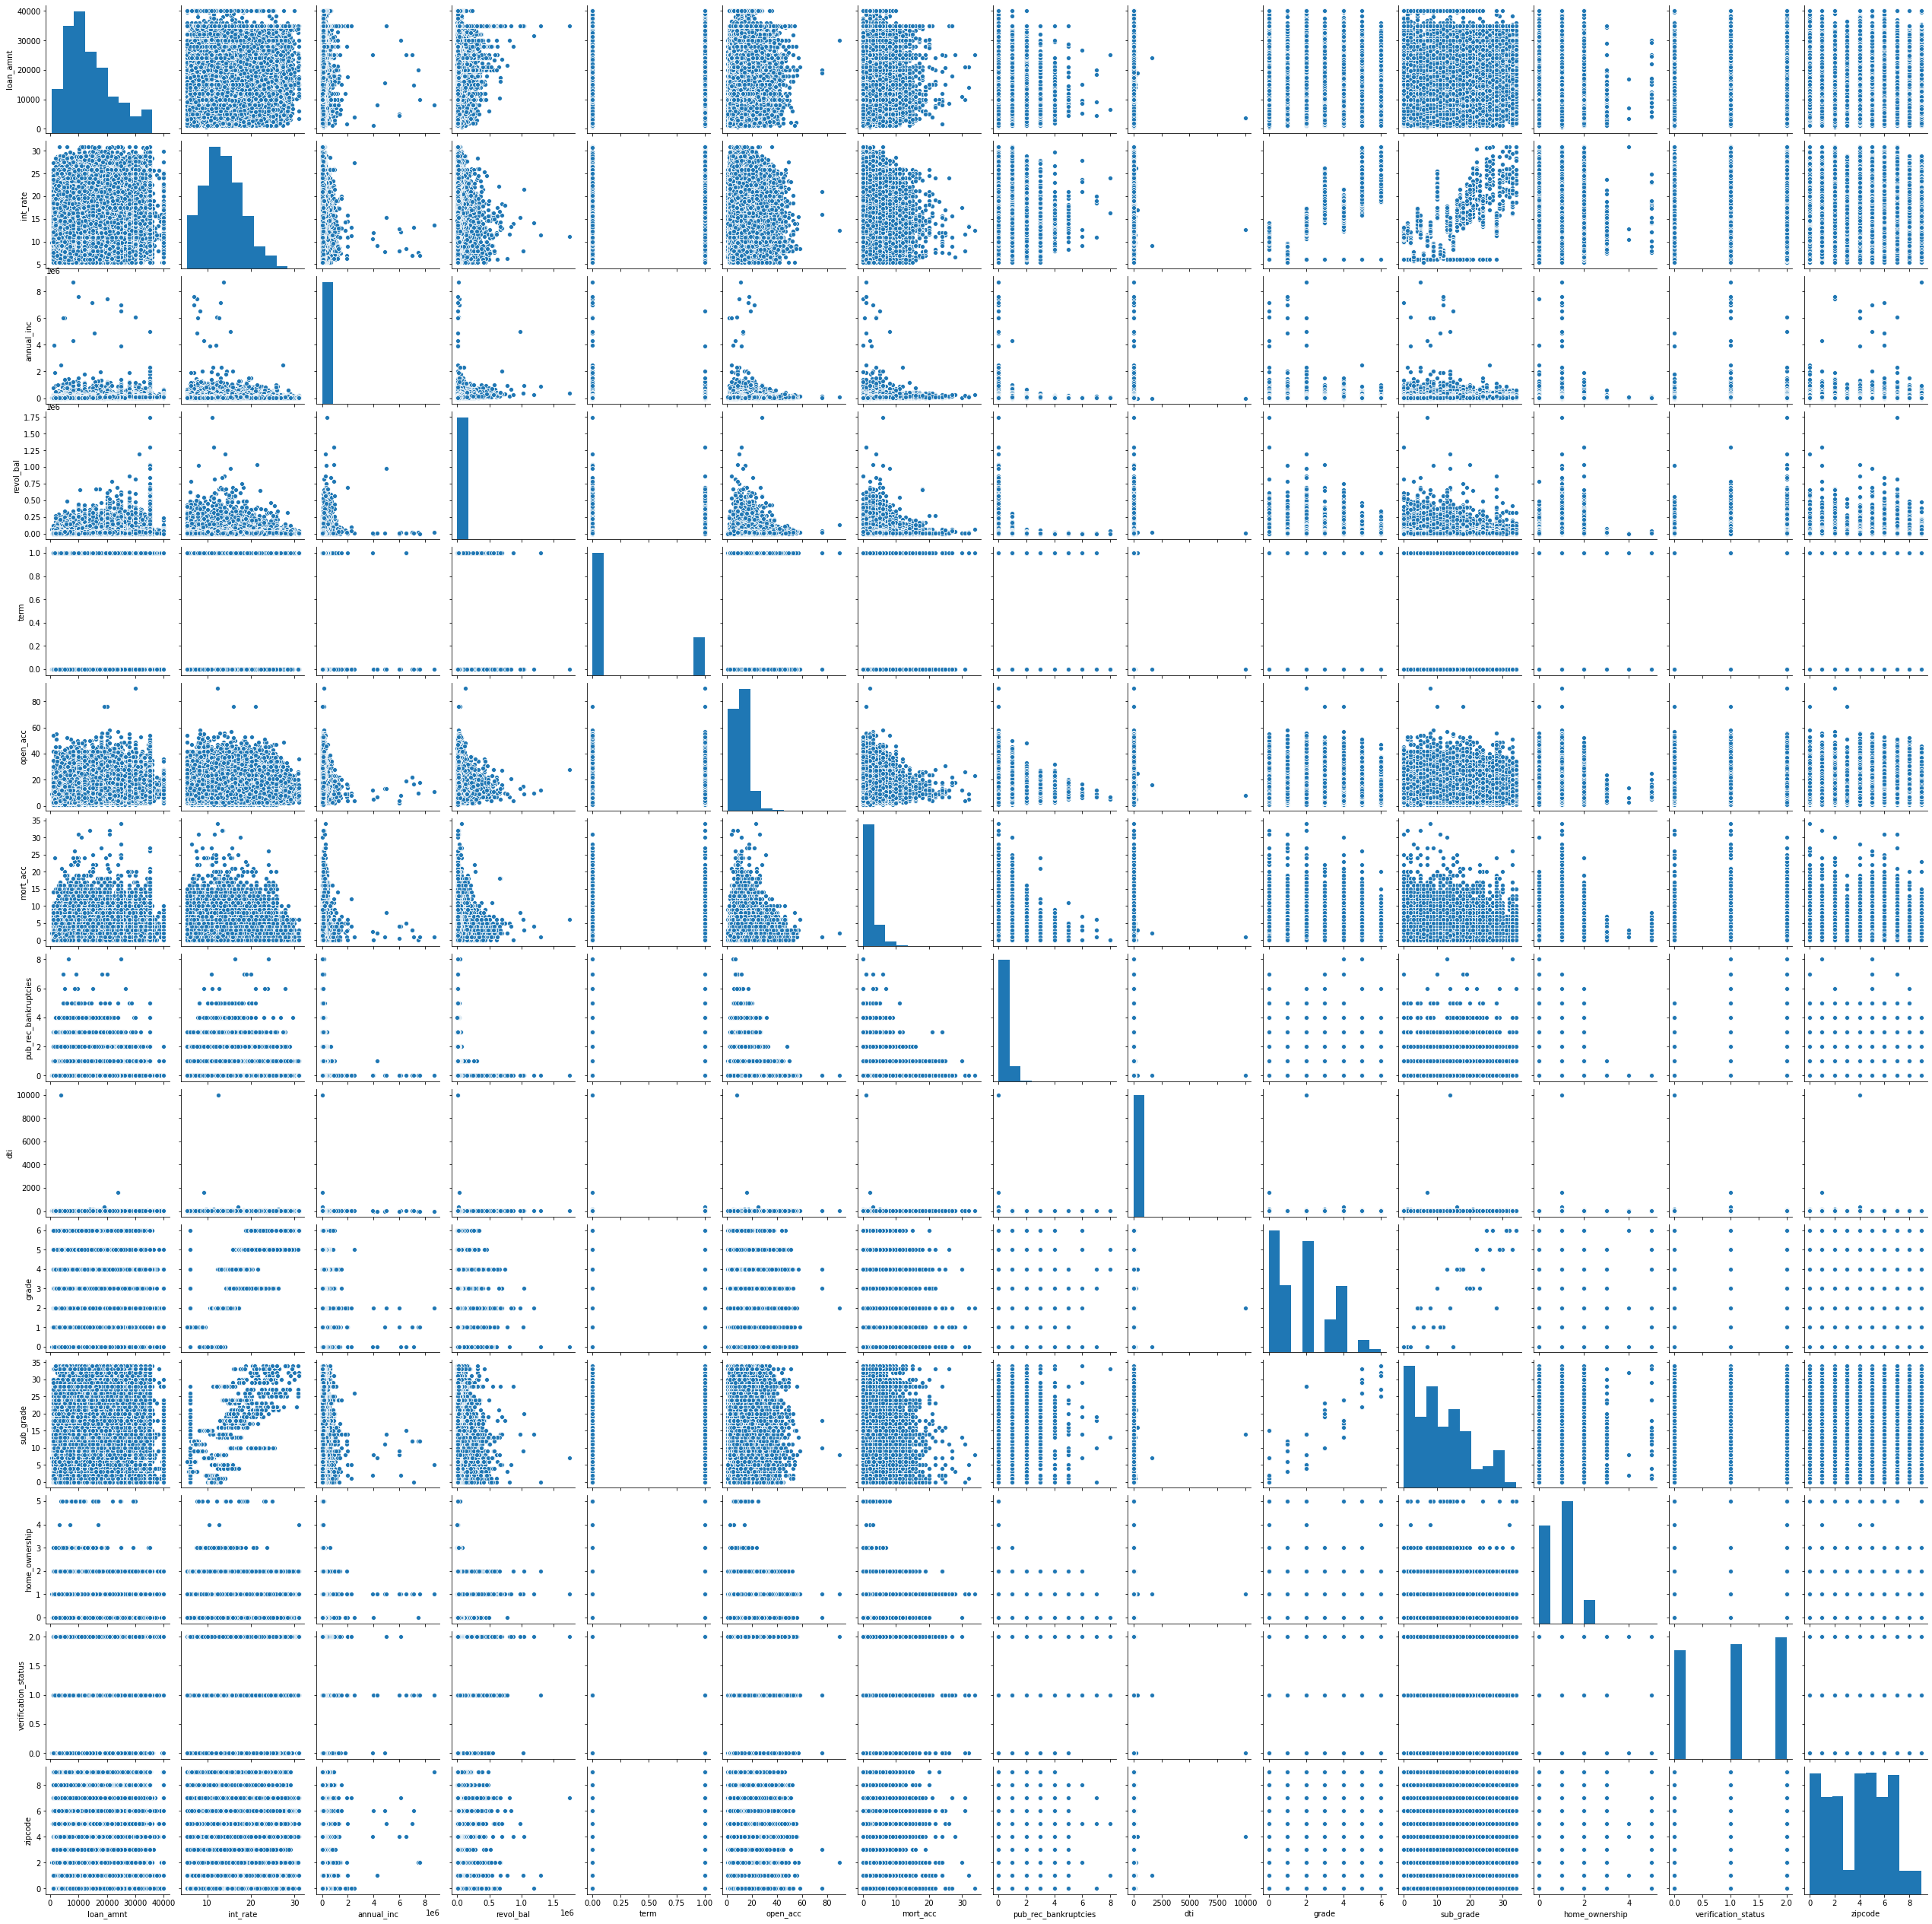

In [75]:
#Based on the confusion matrix, lets drop related columns which may not add any new information to the model
#Removing "installment", "pub_rec", "total_acc",
X=df1[["loan_amnt","int_rate","annual_inc","revol_bal","term","open_acc","mort_acc","pub_rec_bankruptcies","dti","grade","sub_grade","home_ownership","verification_status","zipcode"]]
Y=df1[["loan_status"]]
sns.pairplot(X)

### b) Using the MinMaxScaler we normalize all values. Normalizing is aligning values at mean value to be 0 and providing a relative value to every datapoint in terms of postive or negative deviation from the mean point. 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train,X_test,y_train,y_test=train_test_split(X.values,Y.values,test_size=0.3,random_state=100)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
print(list(df1.columns))
df1.head()

In [141]:
#Since the possible output is loan approved or denied hence using 2 nodes in the output layer 
#and using binary_crossentropy loss function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
model=Sequential()

model.add(Dense(19,activation='sigmoid'))

model.add(Dense(190,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [147]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10)

Epoch 1/10
8646/8646 [==============================] - 8s 919us/step - loss: 0.2642 - accuracy: 0.8875 - val_loss: 0.2654 - val_accuracy: 0.8865
Epoch 2/10
8646/8646 [==============================] - 8s 920us/step - loss: 0.2641 - accuracy: 0.8876 - val_loss: 0.2651 - val_accuracy: 0.8883
Epoch 3/10
8646/8646 [==============================] - 8s 915us/step - loss: 0.2640 - accuracy: 0.8878 - val_loss: 0.2597 - val_accuracy: 0.8889
Epoch 4/10
8646/8646 [==============================] - 8s 926us/step - loss: 0.2637 - accuracy: 0.8879 - val_loss: 0.2666 - val_accuracy: 0.8877
Epoch 5/10
8646/8646 [==============================] - 14s 2ms/step - loss: 0.2640 - accuracy: 0.8875 - val_loss: 0.2602 - val_accuracy: 0.8890
Epoch 6/10
8646/8646 [==============================] - 10s 1ms/step - loss: 0.2637 - accuracy: 0.8877 - val_loss: 0.2658 - val_accuracy: 0.8875
Epoch 7/10
8646/8646 [==============================] - 8s 923us/step - loss: 0.2634 - accuracy: 0.8878 - val_loss: 0.2624 - v

In [148]:
model.summary()
loss=pd.DataFrame(model.history.history)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             multiple                  285       
_________________________________________________________________
dense_39 (Dense)             multiple                  3800      
_________________________________________________________________
dense_40 (Dense)             multiple                  191       
Total params: 4,276
Trainable params: 4,276
Non-trainable params: 0
_________________________________________________________________


In [152]:
predictions=model.predict(X_test)
print(predictions)

[[0.19170722]
 [0.15839168]
 [0.154515  ]
 ...
 [0.05061929]
 [0.00147488]
 [0.29119194]]


In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets